In [1]:
# %%writefile nlp_naive_bayes.py
import numpy as np
import pandas as pd
from pymongo import MongoClient

from sklearn.externals import joblib

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB#, ComplementNB unreleased as of 12/14

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from my_tools import get_bill_data, process_corpus, read_jsonl_file

In [2]:

print('-------------------')
print('Loading original and preprocessed data for vectorizing and modeling...')
data, in_progress = get_bill_data()

# drop bill text column from data and retrieve preprocessed text from corpus_with_labels.jsonl
data.drop('body', axis = 1, inplace = True)

corpus_with_labels = read_jsonl_file('/home/ubuntu/galvanize_capstone/data/nlp/corpus_with_labels.jsonl')
corpus_df = pd.DataFrame(list(corpus_with_labels))

X = corpus_df['document']
y = corpus_df['label'].astype(int)


# create stratified train-test split
print('-------------------')
print('Performing train-test split...')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)#, random_state = 123)

-------------------
Loading original and preprocessed data for vectorizing and modeling...
------------------
------------------
Data includes bills, joints resolutions, and laws with text from the 110th Congress (2007) to present
Make changes in my_tools.get_bill_data to modify the data set.
------------------
-------------------
Performing train-test split...


In [3]:
# load the TfidfVectorizer
print('-------------------')
print('Loading the pickled TfidfVectorizer...')
pickle_path = 'pickle_files/tfidfVectorizer.pkl'
tfvect = joblib.load(pickle_path)
print('Pickled vectorizer loaded.')

-------------------
Loading the pickled TfidfVectorizer...
Pickled vectorizer loaded.


In [6]:
print('-------------------')
print('Vectorizing bill text...')
X_train_vec = tfvect.transform(X_train)
X_test_vec = tfvect.transform(X_test)

print('-------------------')
print('Getting Features...')
features = tfvect.get_feature_names()

-------------------
Getting Features...


In [7]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_y_pred = nb.predict(X_test_vec)#.astype('int')
nb_y_pred_proba = nb.predict_proba(X_test_vec)

print('-------------------')
print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, nb_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, nb_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, nb_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, nb_y_pred)))

-------------------
F1 Score:		0.0073
Recall Score:		0.0037
Precision Score:	0.5000
Accuracy Score:		0.9658


In [9]:
confusion_matrix(y_test, nb_y_pred)

array([[15286,     2],
       [  539,     2]])

In [8]:
in_progress.shape

(26, 25)

In [11]:
# Get input of bill still in progress
input_corpus = process_corpus(in_progress, 'bill_text')

input_vec = tfvect.transform(input_corpus)
input_y_pred = nb.predict(input_vec)
input_y_pred_proba = nb.predict_proba(input_vec)


print(input_y_pred_proba)

------------------
Step 1 of 4: Creating corpus...
------------------
Step 2 of 4: Tokenizing...
------------------
Step 3 of 4: Stripping out stop words, punctuation, and numbers...
------------------
Step 4 of 4: Lemmatizing...
------------------
NLP preprocessing complete ...
[[1.00000000e+00 7.06164973e-13]
 [1.00000000e+00 9.93913466e-15]
 [1.00000000e+00 6.66920319e-12]
 [1.00000000e+00 6.63359524e-24]
 [1.00000000e+00 1.82753872e-12]
 [9.99790073e-01 2.09926915e-04]
 [1.00000000e+00 7.43399950e-14]
 [1.00000000e+00 2.79923955e-15]
 [1.00000000e+00 6.96272837e-14]
 [9.99999992e-01 7.79400005e-09]
 [1.00000000e+00 2.66643474e-12]
 [1.00000000e+00 9.40005241e-12]
 [1.00000000e+00 1.65994254e-12]
 [1.00000000e+00 1.47301128e-12]
 [1.00000000e+00 1.01923607e-11]
 [1.00000000e+00 1.96169891e-13]
 [1.00000000e+00 1.88950309e-13]
 [1.00000000e+00 1.47301128e-12]
 [1.00000000e+00 1.60670386e-11]
 [1.00000000e+00 9.96055683e-13]
 [1.00000000e+00 2.75562885e-13]
 [1.00000000e+00 5.41843686

In [6]:
def plot_scores(x, y_list, name, labels):
    x = x
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot(111)
    ax.set_title(name, fontdict = {'fontsize': 20})
    for y in y_list:
        plt.plot(x, y)
    plt.legend(labels)

    plt.show

In [10]:
# iterate through multiple values of max_features to find ideal
print('-------------------')
print('Iterating though multiple values for max_features...')

a_list = []
r_list = []
p_list = []


# TF-IDF vectorizer
for i in range(250, 5500, 250):
    print('\t max_features = {}'.format(i))
    
    tfvect = TfidfVectorizer(max_features = i)
    X_train_vec = tfvect.fit_transform(X_train)
    X_test_vec = tfvect.transform(X_test)

    nb = MultinomialNB()
    nb.fit(X_train_vec, y_train)
    y_pred = nb.predict(X_test_vec).astype('int')
    
    a_score = accuracy_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    
    a_list.append(a_score)
    r_list.append(r_score)
    p_list.append(p_score)

-------------------
Iterating though multiple values for max_features...
	 max_features = 250
	 max_features = 500
	 max_features = 750
	 max_features = 1000
	 max_features = 1250
	 max_features = 1500
	 max_features = 1750
	 max_features = 2000
	 max_features = 2250
	 max_features = 2500
	 max_features = 2750
	 max_features = 3000
	 max_features = 3250
	 max_features = 3500
	 max_features = 3750
	 max_features = 4000
	 max_features = 4250
	 max_features = 4500
	 max_features = 4750
	 max_features = 5000
	 max_features = 5250


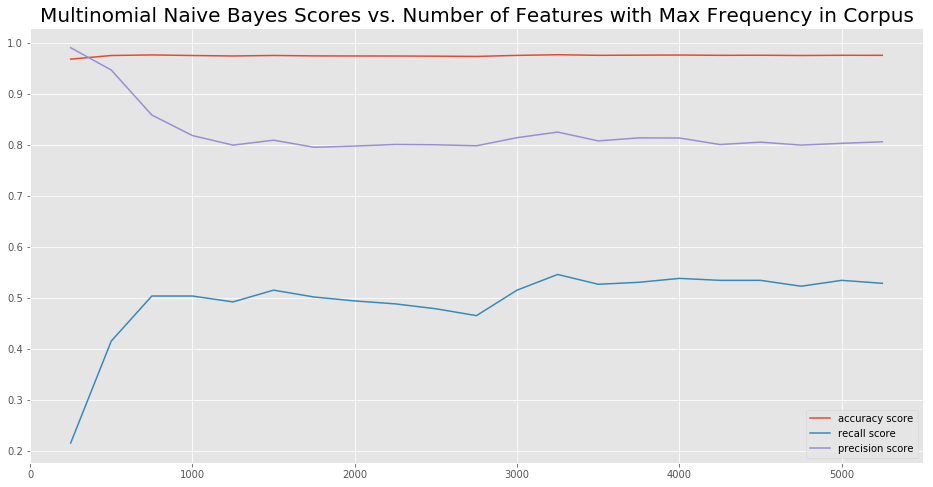

In [16]:
# show graph of scores vs. number of max_features 
x = np.arange(250, 5500, 250)
plot_list = [a_list, r_list, p_list]
graph_name = 'Multinomial Naive Bayes Scores vs. Number of Features with Max Frequency in Corpus'
labels = ['accuracy score', 'recall score', 'precision score']

plot_scores(x, plot_list, graph_name, labels)

In [19]:
ideal_max_feat = x[np.argmax(r_list)]
print('Max Recall Score of {:.3f} obtained when max_features = {}'.format(max(r_list), ideal_max_feat))

Max Recall Score of 0.546 obtained when max_features = 3250


In [29]:
# fix max_features and vary the alpha in the Naive Bayes model
print('-------------------')
print('Iterating though multiple values for alpha in Naive Bayes model...')

a_list = []
r_list = []
p_list = []

x = np.arange(0, .1, .01)

for i in x:
    print('\t alpha = {}'.format(i))
    
    tfvect = TfidfVectorizer(max_features = 3250)
    X_train_vec = tfvect.fit_transform(X_train)
    X_test_vec = tfvect.transform(X_test)

    nb = MultinomialNB(alpha = i)
    nb.fit(X_train_vec, y_train)
    y_pred = nb.predict(X_test_vec).astype('int')
    
    a_score = accuracy_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    
    a_list.append(a_score)
    r_list.append(r_score)
    p_list.append(p_score)

-------------------
Iterating though multiple values for alpha in Naive Bayes model...
	 alpha = 0.0


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


	 alpha = 0.01
	 alpha = 0.02
	 alpha = 0.03
	 alpha = 0.04
	 alpha = 0.05
	 alpha = 0.06
	 alpha = 0.07
	 alpha = 0.08
	 alpha = 0.09


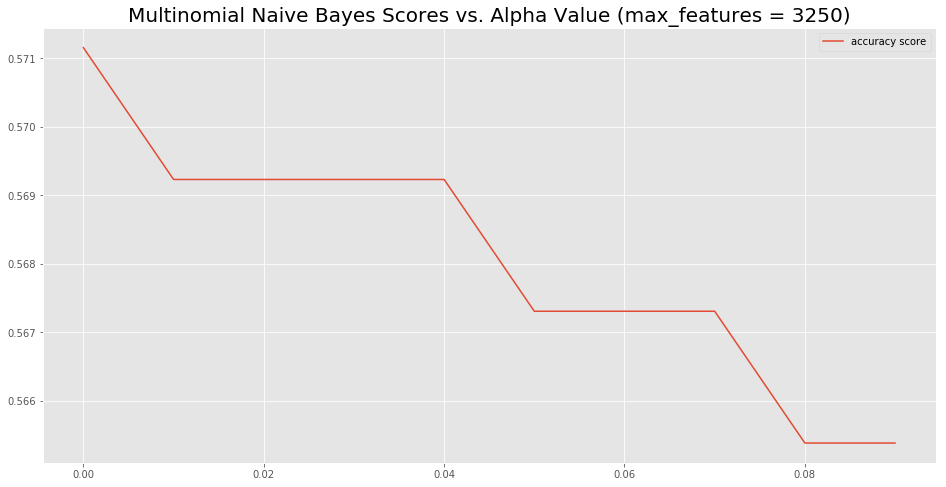

In [30]:
# show graph of scores vs. number of max_features 
x = np.arange(0, .1, .01)
plot_list = [r_list]
graph_name = 'Multinomial Naive Bayes Scores vs. Alpha Value (max_features = 3250)'
labels = ['accuracy score', 'recall score', 'precision score']

plot_scores(x, plot_list, graph_name, labels)

In [32]:
ideal_max_feat = x[np.argmax(r_list)]
print('Max Recall Score of {:.3f} obtained when alpha = {}'.format(max(r_list), ideal_max_feat))

Max Recall Score of 0.571 obtained when alpha = 0.0
